In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

import descartes
from shapely.geometry import Point, Polygon

%matplotlib inline

In [59]:
# https://geo.nyu.edu/catalog/nyu-2451-33888
shape_path = "../Data/GradeARestaurantsManhattan/nyu-GradeARestaurantsManhattan.shp"
shape_map = gpd.read_file(shape_path)

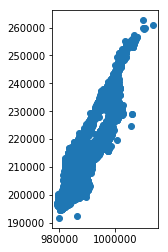

In [60]:
shape_map.plot()

In [61]:
shape_map.iloc[0].geometry.centroid.x

988604.4643000066

In [62]:
shape_map.iloc[0].geometry.centroid.y

218857.2609000057

In [63]:
shape_map_geo = shape_map.to_crs(epsg=4326)

In [64]:
shape_map_geo.iloc[0].geometry.centroid.x

-73.9842813882899

In [65]:
shape_map_geo.iloc[0].geometry.centroid.y

40.76739617727165

In [66]:
shape_map_geo.geometry.head()

0     POINT (-73.9842813882899 40.76739617727165)
1    POINT (-73.96973395658408 40.76869397110391)
2    POINT (-73.95228016067013 40.76788590463527)
3    POINT (-73.99239401990168 40.73074399669723)
4    POINT (-73.97595532697572 40.78654870279449)
Name: geometry, dtype: object

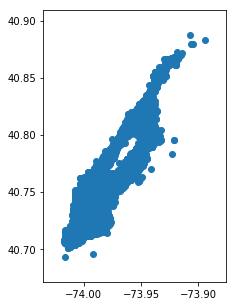

In [67]:
ax = shape_map_geo.geometry.plot(figsize = (5,5))
plt.show()

## Setting Truck spots for Drone deployment

In [68]:
from sklearn.cluster import KMeans

In [143]:
model = KMeans(n_clusters = 7)

In [144]:
x = shape_map_geo.geometry.centroid.x
y = shape_map_geo.geometry.centroid.y
geo_data = np.vstack((x, y)).T
geo_data = geo_data[~np.isnan(geo_data).any(axis=1)]
geo_data = geo_data[~np.isinf(geo_data).any(axis=1)]

geo_data[:4]

array([[-73.98428139,  40.76739618],
       [-73.96973396,  40.76869397],
       [-73.95228016,  40.7678859 ],
       [-73.99239402,  40.730744  ]])

In [145]:
model.fit(geo_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [146]:
labels = model.predict(geo_data)

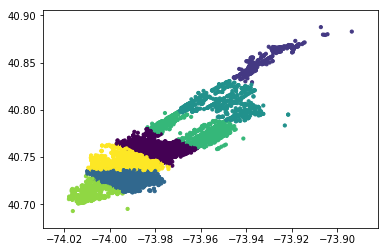

In [150]:
plt.scatter(geo_data[:,0], geo_data[:,1], c=labels, s=10, cmap='viridis')

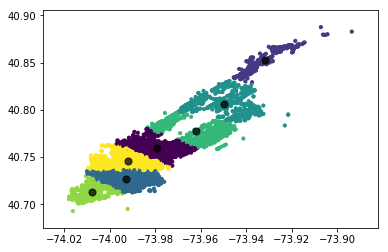

In [151]:
centers = model.cluster_centers_

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(geo_data[:,0], geo_data[:,1], c=labels, s=10, cmap='viridis')
ax1.scatter(centers[:,0], centers[:,1], c='black', s=50, alpha=0.75)

plt.show()

#plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.75)

In [154]:
warehouse_model = KMeans(n_clusters=1)

In [155]:
warehouse_model.fit(centers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [157]:
warehouse_model.predict(centers)
warehouse_location = warehouse_model.cluster_centers_

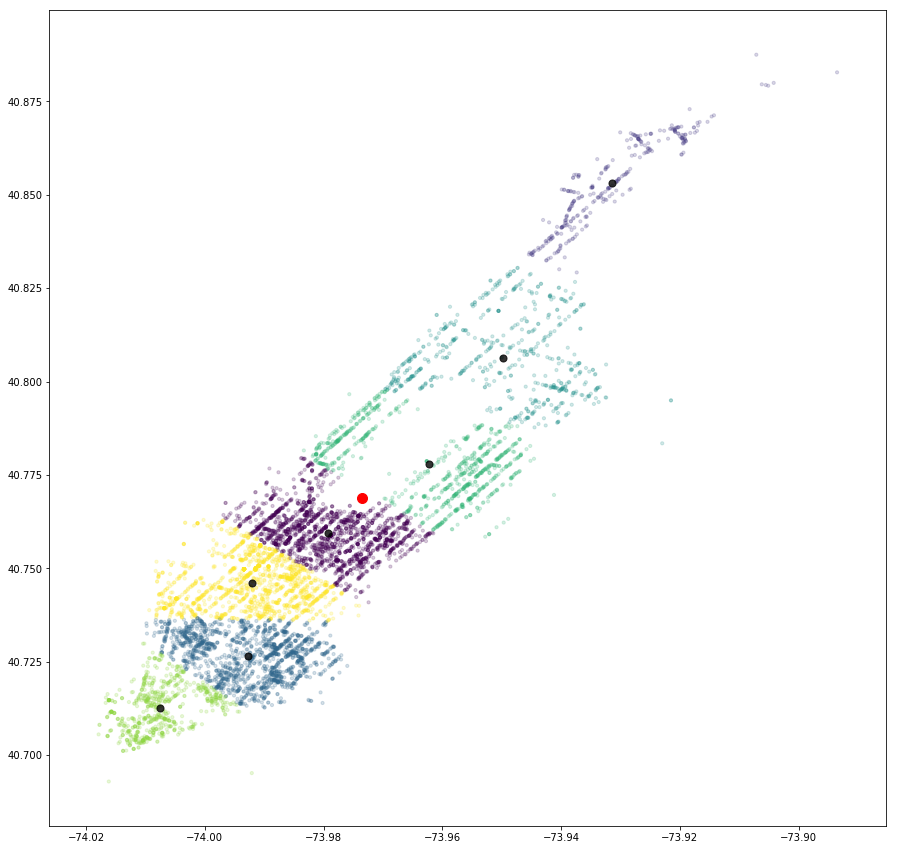

In [166]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(111)

ax1.scatter(geo_data[:,0], geo_data[:,1], c=labels, s=10, cmap='viridis', alpha = .2)
ax1.scatter(centers[:,0], centers[:,1], c='black', s=50, alpha=0.8)
ax1.scatter(warehouse_location[:,0], warehouse_location[:,1], c='red', s=100, alpha=1)

plt.show()